<a href="https://colab.research.google.com/github/mesh98a/DeepLearning/blob/main/Lab2v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!git clone https://github.com/mesh98a/DeepLearning
%cd DeepLearning


Cloning into 'DeepLearning'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 7), reused 21 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 3.40 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/DeepLearning/DeepLearning/DeepLearning


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN , Embedding, LSTM , GRu
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [41]:
num_words = 10000
max_len = 65

In [70]:
df_train = pd.read_csv('/content/DeepLearning/Data/drugLibTrain_raw.tsv',delimiter='\t')
df_test = pd.read_csv('/content/DeepLearning/Data/drugLibTest_raw.tsv',delimiter='\t')

In [162]:
def split_rating(df):
  conditions = [
    df['rating'] <= 4,
    df['rating'].between(5, 7),
    df['rating'] >= 8
  ]

  choices = [0, 1, 2]
  df['rating_category'] = np.select(conditions, choices)
  return df
split_rating(df_train)
split_rating(df_test)
y_train = df_train['rating_category']
y_test = df_test['rating_category']
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [170]:
df_train["effectiveness"].value_counts()

,count
effectiveness,
Highly Effective,1330
Considerably Effective,928
Moderately Effective,415
Ineffective,247
Marginally Effective,187


In [85]:
#X_train_text = df_train['commentsReview'].fillna('')
#X_test_text = df_test['commentsReview'].fillna('')
#X_train_text.head()

,commentsReview
0,"monitor blood pressure , weight and asses for ..."
1,"I Hate This Birth Control, I Would Not Suggest..."
2,I took 2 pills at the onset of my menstrual cr...
3,I was given Prilosec prescription at a dose of...
4,See above


In [163]:
def combine_reviews(df):
    return (
        df['benefitsReview'].fillna('') + ' ' +
        df['sideEffectsReview'].fillna('') + ' ' +
        df['commentsReview'].fillna('')
    )
X_train_text = combine_reviews(df_train)
X_test_text = combine_reviews(df_test)
print(X_train_text[0])



mangagement of congestive heart failur cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness monitor blood pressure , weight and asses for resolution of fluid


In [137]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train_text)

In [138]:
tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(X_train_text)
sequences_test = tokenizer.texts_to_sequences(X_test_text)

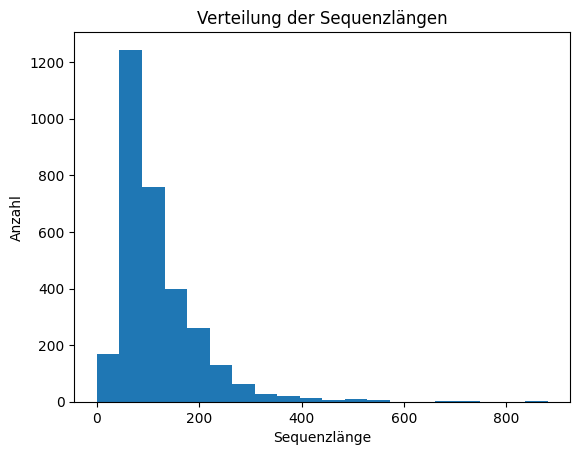

146


In [139]:
seq_lengths = [len(seq) for seq in sequences_train]

plt.hist(seq_lengths, bins=20)
plt.xlabel('Sequenzlänge')
plt.ylabel('Anzahl')
plt.title('Verteilung der Sequenzlängen')
plt.show()
max_len = int(np.percentile(seq_lengths, 75))
print(max_len)

In [140]:
print(X_train_text[5])
print(sequences_train[0])

after taking propecia for over a year, starting when i was 20 years of age my hair continued to thin, and i noticed no significant benefits Low sex drive, before i started taking this drug i was 19 years of age and full of "enthousiasm". Now engaged and 21 years old, my sex drive is very low, my wife and I are very unsatisfied. I am also very tired even during peak hours throughout the day, and its hard to concentrate on mundain tasks one pill once daily
[1190, 2, 2185, 6, 417, 7601, 1899, 236, 4702, 251, 2186, 44, 820, 31, 14, 85, 3563, 10, 2, 7602, 6, 1636, 44, 7603, 6, 4009, 251, 7604, 521, 5705, 7605, 3253, 4010, 2186, 5706, 7606, 2078, 5707, 7607, 4011, 2450, 7608, 7609, 1250, 342, 7610, 1250, 2187, 123, 192, 121, 4, 7611, 11, 3564, 6, 1431]


In [141]:
X_train_pad = pad_sequences(sequences_train, maxlen=max_len)
X_test_pad = pad_sequences(sequences_test, maxlen=max_len)

In [168]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1190,    2, 2185,    6,  417, 7601, 1899,  236, 4702,  251,
       2186,   44,  820,   31,   14,   85, 3563,   10,    2, 7602,    6,
       1636,   44, 7603,    6, 4009,  251, 7604,  521, 5705, 7605, 3253,
       4010, 2186, 5706, 7606, 2078, 5707, 7607, 4011, 2450, 7608, 7609,
       1250,  342, 7610, 1250, 2187,  123,  192,  121,    4, 7611,   11,
       3564,    6, 1431], dtype=int32)

LSTM

In [157]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 64, input_length=148))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [158]:
from sklearn.utils.class_weight import compute_class_weight

# Get the original integer labels for computing class weights
# The original integer labels are stored in df_train['rating_category']
class_weights = compute_class_weight('balanced', classes=np.unique(df_train['rating_category']), y=df_train['rating_category'])
class_weights = dict(enumerate(class_weights))

# The rest of your code remains the same:
# y_train and y_test are already one-hot encoded for the model
# history = model_lstm.fit(X_train_pad, y_train, epochs=7, batch_size=128, validation_split=0.1,class_weight=class_weights)

In [159]:
history = model_lstm.fit(X_train_pad, y_train, epochs=7, batch_size=128, validation_split=0.1,class_weight=class_weights)

Epoch 1/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.2988 - loss: 1.1051 - val_accuracy: 0.3955 - val_loss: 1.0905
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6076 - loss: 1.0711 - val_accuracy: 0.4437 - val_loss: 1.0730
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6558 - loss: 1.0084 - val_accuracy: 0.5466 - val_loss: 0.9775
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7468 - loss: 0.8066 - val_accuracy: 0.5305 - val_loss: 0.9718
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7986 - loss: 0.6338 - val_accuracy: 0.4662 - val_loss: 1.0240
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8081 - loss: 0.4679 - val_accuracy: 0.5498 - val_loss: 1.0210
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8953 - loss: 0.3180 - val_accuracy: 0.5402 - val_loss: 1.0725


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5027 - loss: 1.1529


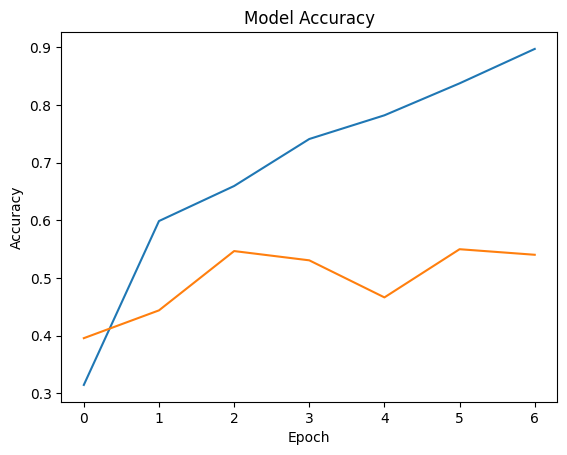

In [160]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
scores = model_lstm.evaluate(X_test_pad, y_test)

In [161]:
from sklearn.metrics import classification_report

y_pred = model_lstm.predict(X_test_pad).argmax(axis=1)
y_test_multiclass = y_test.argmax(axis=1)
print(classification_report(y_test_multiclass, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0       0.59      0.47      0.53       241
           1       0.29      0.42      0.35       246
           2       0.65      0.58      0.61       549

    accuracy                           0.52      1036
   macro avg       0.51      0.49      0.49      1036
weighted avg       0.55      0.52      0.53      1036



[[114  65  62]
 [ 31 104 111]
 [ 47 185 317]]


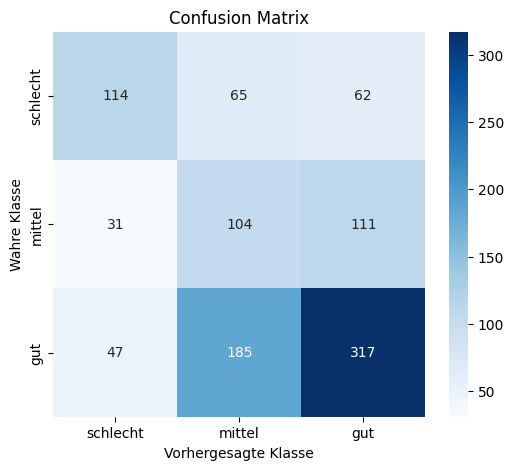

In [167]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_multiclass, y_pred)
print(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['schlecht','mittel','gut'], yticklabels=['schlecht','mittel','gut'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.title('Confusion Matrix')
plt.show()



GRU


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.5002 - loss: 1.0759 - val_accuracy: 0.5820 - val_loss: 1.0044
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.5553 - loss: 0.9823 - val_accuracy: 0.5820 - val_loss: 0.9665
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.5612 - loss: 0.9298 - val_accuracy: 0.5852 - val_loss: 0.9670
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6005 - loss: 0.8403 - val_accuracy: 0.5723 - val_loss: 0.9847
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.6703 - loss: 0.7483 - val_accuracy: 0.5466 - val_loss: 1.0341
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.7359 - loss: 0.6216 - val_accuracy: 0.5402 - val_loss: 1.1268
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.8187 - loss: 0.4862 - val_accuracy: 0.5595 - val_loss: 1.1982


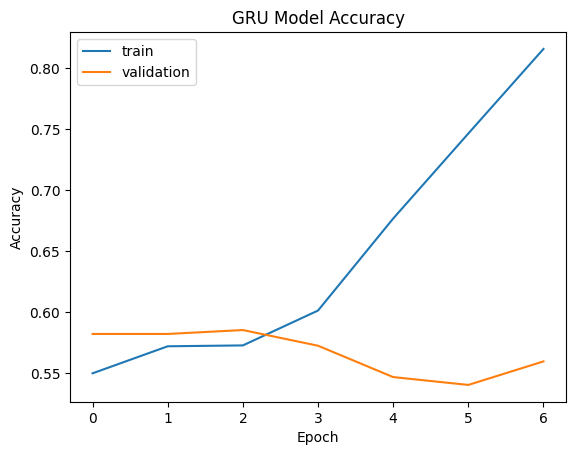

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5160 - loss: 1.2833
GRU Test loss: 1.270
GRU Test accuracy: 0.515
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Classification Report for GRU Model:
              precision    recall  f1-score   support

           0       0.37      0.32      0.34       241
           1       0.34      0.12      0.17       246
           2       0.57      0.78      0.66       549

    accuracy                           0.52      1036
   macro avg       0.43      0.40      0.39      1036
weighted avg       0.47      0.52      0.47      1036



In [151]:


model_gru = Sequential()
model_gru.add(Embedding(num_words, 64, input_length=148))
model_gru.add(GRU(16))
model_gru.add(Dense(3, activation='softmax'))

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_gru.summary()

history_gru = model_gru.fit(X_train_pad, y_train, epochs=7, batch_size=128, validation_split=0.1)

plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

scores_gru = model_gru.evaluate(X_test_pad, y_test)
print(f'GRU Test loss: {scores_gru[0]:.3f}')
print(f'GRU Test accuracy: {scores_gru[1]:.3f}')


y_pred_gru = model_gru.predict(X_test_pad).argmax(axis=1)
y_test_multiclass = y_test.argmax(axis=1)
print("Classification Report for GRU Model:")
print(classification_report(y_test_multiclass, y_pred_gru))